In [ ]:
# @title Assignment Corrections (Run Cell to Fetch / Refresh)
import base64
import datetime
import json
from urllib.request import urlopen
from IPython.display import Markdown
exec_tz = datetime.datetime.now().astimezone().tzinfo
exec_timestamp = datetime.datetime.now(tz=exec_tz).strftime("%Y-%m-%d %H:%M:%S %Z")
gh_url = "https://api.github.com/repos/jpowerj/dsan-corrections/contents/2024-spr-dsan5500/DSAN5500_HW1_Corrections.md?ref=main"
md_data = json.load(urlopen(gh_url))
md_content_b64 = md_data['content']
md_content = base64.b64decode(md_content_b64).decode('utf-8')
corrections_content = md_content + f"\n\nLast fetched: {exec_timestamp}"
Markdown(corrections_content)

**DSAN 5500 HW1 Corrections:**

* (2024-01-28, 9pm EST) Since the first two corrections are not breaking, I have **auto-updated your notebooks** to fix them
  * (So, you **don't need to worry about them**, unless you made a **local copy** of the `.ipynb` file, in which case you'll need to apply the fixes to your local copy). I also **moved the `mypy` installation command** out of the first block and into the code block directly before **Question 2.1**. This should now mean that the top-of-file code block, which fetches these corrections, runs much faster!

(Issues auto-fixed in Colab versions:)

* *(2024-01-30, 7:00pm EST)* *In the second public test for **Question 5.2**, extraneous parentheses after `FancyLinkedList` removed; now updated to be `len(signature(FancyLinkedList.append).parameters) == 2`*
* *(2024-01-28, 8:44pm EST)* *In **Question 4.1**, the description of the `Swimmer` class is from an older version of the homework, which had `favorite_event` instead of `favorite_swim_style`. So, please replace "`compute_favorite_event()`" with "`compute_favorite_swim_style()`" and replace "`favorite_event` instance variable" with "`favorite_swim_style` instance variable". Thank you to Yanfeng for discovering this issue!*
* *(2024-01-28, 8:46pm EST)* *At the **end of the starter code** and in the **public tests** for **Question 4.2**, please replace the dictionary key `'average'` with the dictionary key `'favorites'` (matching the Q4.2 instructions). Thank you again Yanfeng for finding this!*

Last fetched: 2024-02-01 23:08:26 UTC

# DSAN 5500 HW1: Python Fundamentals

**Due Friday, February 2, 11:59pm EST**

The goal of this homework is to provide you with hands-on experience with some fundamental **data structures** and some fundamentals of **algorithm design**, by exploring their **implementation** in Python.


## Part 1: Stack vs. Heap


In the first session, we learned about how **variables** in a programming language exist in the computer's memory in either the **stack** or the **heap**. The variables existing in the **stack** are those whose values are "primitive" data types, which means that we know *how much memory will be required to store them*:

* `None` (a "blank" value, for variables whose values have not been set)
* `int` (e.g., `3`)
* `float` (e.g., `3.14`)

For all other types of values however (for example, `string`), the value stored in the **stack** is only a **pointer** to a more complex structure existing in the **heap**. In other words, we now have four rather than three types of values that can be stored in the stack:

* `None`
* `int`
* `float`
* Memory addresses ("pointers" to objects living in the heap; e.g., `0x5c34811b`)

The following questions in Part 1, therefore, will test your understanding of the stack vs. heap distinction.

For each of the following Python variable assignments, choose whether the value stored in the stack will be `None`, an `int`, a `float`, or a pointer to the heap:

### Question 1.1

The following code cell tells Python to create a variable called `x_1` as an entry in its memory **stack**, then tells it to place some value into this entry.

From among the four choices in the dropdown (`"None"`, `"int"`, `"float"`, and `"pointer"`), select the choice representing what **type of value** will be stored in Python's memory **stack** for the variable `x_1`.

**Please keep in mind that the dropdown box is just a "helper" provided by Colab for questions like this**. Choosing an option from the dropdown box **does not actually *run* any Python code** (as you'll see, it just modifies the Python code within the cell). This means that, for the variable containing your response (`q1_1_response`) to exist in Python's memory, you'll need to ***run* the code cell itself** after you've chosen one of the options from the dropdown menu.

In [ ]:
x_1 = 5 + 5

In [ ]:
# @title Q1.1-response
q1_1_response = "int" # @param ["", "None", "int", "float", "pointer"]

In [ ]:
# @title Q1.1-public-tests
q1_1_public_tests = {
    'Response variable defined': 'Passed!' if 'q1_1_response' in vars() else "No variable named 'q1_1_response' exists in Python's memory."
}
q1_1_public_tests

{'Response variable defined': 'Passed!'}

## Question 1.2

Using the same instructions as Question 1.1, select the choice representing the **type of value** that will be stored in Python's memory **stack** for the variable `x_2`

In [ ]:
x_2 = 2 ** (1/2)

In [ ]:
# @title Q1.2-response
q1_2_response = "float" # @param ["", "None", "int", "float", "pointer"]

In [ ]:
# @title Q1.2-public-tests
q1_2_public_tests = {
    'Response variable defined': 'Passed!' if 'q1_2_response' in vars() else "No variable named 'q1_2_response' exists in Python's memory."
}
q1_2_public_tests

{'Response variable defined': 'Passed!'}

### Question 1.3

Using the same instructions as Question 1.1, select the choice representing the **type of value** that will be stored in Python's memory **stack** for the variable `x_3`

In [ ]:
x_3 = [num ** 2 for num in [1, 2, 3, 4]]

In [ ]:
# @title Q1.3-response
q1_3_response = "pointer" # @param ["", "None", "int", "float", "pointer"]

In [ ]:
# @title Q1.3-public-tests
q1_3_public_tests = {
    'Response variable defined': 'Passed!' if 'q1_3_response' in vars() else "No variable named 'q1_3_response' exists in Python's memory."
}
q1_3_public_tests

{'Response variable defined': 'Passed!'}

### Question 1.4

Using the same instructions as Question 1.1, select the choice representing the **type of value** that will be stored in Python's memory **stack** for the variable `x_4`

In [ ]:
def my_cool_function(the_input):
  print(the_input)

x_4 = my_cool_function('Watch out this one is tricky :O')

Watch out this one is tricky :O


In [ ]:
# @title Q1.4-response
q1_4_response = "None" # @param ["", "None", "int", "float", "pointer"]

In [ ]:
# @title Q1.4-public-tests
q1_4_public_tests = {
    'Response variable defined': 'Passed!' if 'q1_4_response' in vars() else "No variable named 'q1_4_response' exists in Python's memory."
}
q1_4_public_tests

{'Response variable defined': 'Passed!'}

## Part 2: Type Hints

In the first session we also talked about how Python's syntax does **not** require you to specify the **types** of variables when you create them, so that for example a variable whose value was originally an `int` might be changed later on to be a pointer to a `string`.

However, we also saw how Python supports "non-enforced" **type hints**, which you can use to specify (for example) that a function you are writing only supports inputs of type `int` or `float`, and will return a value of type `int`.

You can see an example of this in the following two versions of a function for obtaining the <a href='https://en.wikipedia.org/wiki/Integer_part' target='_blank'>integer part</a> of a number (whether `int` or `float`), where the first version does not include any type hints while the second version does include these hints:

In [ ]:
def intpart_nohints(x):
  return int(x)

def intpart_hints(x: int | float) -> int:
  return int(x)

Now, it's important to note that Python itself does **not** enforce these type hints. We could just as easily have defined the function with bad/false type hints, and they would not run any differently:

In [ ]:
def intpart_badhints(x: str) -> bool:
  return int(x)

And we can now **call** the three functions with inputs of the expected type, to obtain the answers:

In [ ]:
print(intpart_nohints(5.2))
print(intpart_hints(5.2))
print(intpart_badhints(5.2))

5
5
5


Or we can call the three functions with **invalid** input types, to see what happens:

In [ ]:
print(intpart_nohints('5'))
print(intpart_hints('5'))
print(intpart_badhints('5'))

5
5
5


These results might "trick" you into thinking that the function is fine, and will just convert strings into numbers then compute the correct answer... But look at what happens when we try this with a string containing digits like `'5.2'`:

In [ ]:
try:
  intpart_nohints('5.2')
except ValueError as e:
  print(e)

invalid literal for int() with base 10: '5.2'


The point here is that type hints, in **base Python** (meaning, run in the normal way that Python code is run), are **optional** and are **not enforced**, but exist only to help with **documentation** and to help you informally when you are **debugging**.

However, we can do better than this. We can help ourselves during the debugging process using a tool called `mypy` which **checks** the type hints, and produces messages which can help you identify where the error(s) in your code are coming from. Since `mypy` was developed to check `.py` files, but we use `.ipynb` files throughout many DSAN courses, we'll have to do something a bit tricky called a **cell magic**, which **treats a cell of a Jupyter notebook as if it was a `.py` file** and runs `mypy` on the cell in this way.

You can see this cell magic in action by running the following two cells:

In [ ]:
# @title typecheck-setup
from IPython.utils import io
try:
  from mypy import api
except ModuleNotFoundError:
  with io.capture_output() as captured:
    %pip install mypy;
from IPython.core.magic import register_cell_magic
@register_cell_magic
def typecheck(line, cell):
    from IPython import get_ipython
    from mypy import api
    cell = '\n' + cell
    mypy_result = api.run(['-c', cell] + line.split())
    if mypy_result[0]:  # print mypy stdout
        print(mypy_result[0])
    if mypy_result[1]:  # print mypy stderr
        print(mypy_result[1])
    shell = get_ipython()
    shell.run_cell(cell)

In [ ]:
%%typecheck
def intpart_nohints(x):
  return int(x)

def intpart_hints(x: int | float) -> int:
  return int(x)

def intpart_badhints(x: str) -> bool:
  return int(x)

try:
  print(intpart_nohints('5.2'))
  print(intpart_hints('5.2'))
  print(intpart_badhints('5.2'))
except ValueError as e:
  print(e)

<string>:9: error: Incompatible return value type (got "int", expected "bool")  [return-value]
<string>:13: error: Argument 1 to "intpart_hints" has incompatible type "str"; expected "int | float"  [arg-type]
Found 2 errors in 1 file (checked 1 source file)

invalid literal for int() with base 10: '5.2'


The first two lines in the above output give us helpful clues as to what might be wrong with our code, **before** the actual error (`ValueError`) happens!

Notice what the messages tell us. The first one says:

`<string>:9: error: Incompatible return value type (got "int", expected "bool")  [return-value]`

Which tells us that on **line 9** of the cell, the value we're returning is guaranteed to be of type `int`, but our type hints indicate that the function is supposed to be returning a value of type `bool`.

The second one says:

`<string>:12: error: Argument 1 to "intpart_hints" has incompatible type "str"; expected "int | float"  [arg-type]`

Which is actually more helpful for debugging the eventual `ValueError` we encounter: it tells us that on **line 12** of the cell, we are calling `intpart_hints()` with an argument of type `str`, when in fact the input should be of type `int | float` (meaning, either type `int` or type `float`). So, this second message can help us see that, if we want to fix the `ValueError`, we should **change** our code to instead call `intpart_hints()` with an argument of type `int` or `float`.

### Question 2.1

We're hoping to write a function called `intlength` that takes in an integer `my_num` and returns the **number of digits** in its standard (base-10) representation. The function, without type hints, looks as follows:

```python
def intlength(my_num):
  return len(str(my_num))
```

Please write a new version of this function, called `intlength_hints`, which does the same thing but include **type hints** for both:

* (a) The type(s) accepted for the input argument `my_num`, and
* (b) The type(s) that the function will return.

In [ ]:
# @title Q2.1-response
# Your code here
def intlength_hints(my_num: int) -> int:
  return len(str(int(my_num)))


In [ ]:
# @title Q2.1-public-tests
q2_public_tests = {
    'Function defined': 'Passed!' if 'intlength_hints' in vars() else "No function called 'intlength_hints()' was defined.",
    'Type hints on x': 'Passed!' if 'intlength_hints' in vars() and (_i is not None) and ('my_num:' in _i) else "No type hints on input x",
    'Return type hints': 'Passed!' if 'intlength_hints' in vars() and (_i is not None) and ('->' in _i) else "No type hints on function return value"
}
q2_public_tests

{'Function defined': 'Passed!',
 'Type hints on x': 'Passed!',
 'Return type hints': 'Passed!'}

## Part 3: Insertion Sort vs. Merge Sort

In Week 2 we looked at both **insertion sort** and **merge sort** and saw how, despite the fact that insertion sort is much **simpler** to code and understand, merge sort is in fact **more efficient** in the sense of being in a strictly faster **complexity class**: insertion sort operates in $O(n)$ time, while merge sort's *divide-and-conquer* approach allows it to operate in $O(\log n)$ time.

So, for this part of the assignment, you will **implement** both insertion sort and merge sort, then run your implementations on lists of different sizes to see how the difference in efficiency is negligible for small lists but becomes more and more noticeable as the lists we're trying to sort get longer.

### Part 3.1: Insertion Sort

Here you will build on our starter code to implement the insertion sort algorithm, then you will write a quick check of its *correctness*.



#### Question 3.1.1: Writing Insertion Sort

Complete the `insertion_sort()` function started for you in the following cell (with the title `Q3.1.1-response`):

In [ ]:
# @title Q3.1.1-response
def insertion_sort(input_list):
  n = len(input_list)
  # Go through the list in order, ensuring that if the first k list elements are
  # in order at the beginning of a loop iteration, then at the end of that loop
  # iteration the first (k + 1) list elements will be in order.
  # Since we don't have to do anything to ensure that the first element in the
  # list is "sorted" (since it's only one element), we can start our loop at the
  # *second* element of the list, that is, we can start with i == 1, given that
  # the above loop invariant holds (the first k == 1 elements are already sorted)

  for i in range(1,n):
    if n <= 1:
      return
    else:
      current = input_list[i] # store the current element
      j = i-1
      while j >=0 and current <= input_list[j]:
        input_list[j+1] = input_list[j]
        j -= 1
        # print("i: ", i, "j: ", j, "\ncurrent: ", input_list[j])
      input_list[j+1] = current

  return input_list

In [ ]:
# @title Q3.1.1-public-tests
q3_1_1_public_tests = {
    'Small input': 'Passed!' if insertion_sort([3,2,5,4]) == [2,3,4,5] else "insertion_sort() fails on four-element input"
}
q3_1_1_public_tests

{'Small input': 'Passed!'}

#### Question 3.1.2: Checking *Correctness* of Insertion Sort

An extremely good habit to get into when developing algorithms/data structures is to pair every bit of code you write with some additional code that **checks its correctness**. For this question, write some code in the following cell (titled `Q3.1.2-response`) that runs the `insertion_sort()` function you wrote above on the input list `[3, 2, 5, 4]` and checks that it correctly sorts this input list to produce the output `[2, 3, 4, 5]`.

This question is here to get you into the habit of writing these correctness checks for algorithms you write, but also to get you into the habit of writing code in such a way that it can be checked by **automated code checkers** like the autograder for this class ;) To this end, you need to make sure that **running your code cell produces a `bool` value**, either `True` or `False`.

Please note that this is
* **different from *printing* `True` or `False`**, and
* **different from *returning a value* of `True` or `False` from a function!**

The way Jupyter notebooks work is that the **value produced by the last line in a code cell** is considered to be the value **"produced by"** that code cell. So, in this case, that means you need to make sure that the **last line** in the following code cell produces a `bool` value (either `True` or `False`).

*(Final disclaimer: returning a `bool` value of `True` or `False` is, once again, **not** the same as returning a `str` value of `"True"` or `"False"`!)*

In [ ]:
# @title Q3.1.2-response
# Your code here

if insertion_sort([3,2,5,4]) == [2,3,4,5]:
  print(True)
else:
  print(False)

True


In [ ]:
# @title Q3.1.2-public-tests
q3_1_2_public_tests = {
    'Calls insertion_sort() function': 'Passed!' if 'insertion_sort' in _i else "insertion_sort() function never called within cell."
}
q3_1_2_public_tests

{'Calls insertion_sort() function': 'Passed!'}

### Part 3.2: Writing Merge Sort

Here, like in the last part, you will write your own implementation of the **merge sort** algorithm and then run a quick check of its **correctness**.

#### Question 3.2.1: Writing Merge Sort

In the following cell, please build on the provided starter code to implement **merge sort** via the `merge_sort()` function:

In [ ]:
# @title Q3.2.1-response
import math
def merge_sort(A):
  A_first_index = 0
  A_last_index = len(A) - 1
  return merge_sort_helper(A, A_first_index, A_last_index)

def merge_sort_helper(A, p, r):
  if p >= r:
    return A
  q = math.floor((p+r)/2)
  merge_sort_helper(A, p, q)
  merge_sort_helper(A, q+1, r)
  merge(A, p, q, r)
  return A

def merge(A, p, q, r):
  # Your code here
  # p: first index
  # q: middle index
  # r: last index
  left = A[p:q+1]
  right = A[q+1:r+1]

  left.append(float('inf')) # set the end of the array with infinite number
  right.append(float('inf'))

  i=j=0
  for k in range(p, r + 1):
    if left[i] <= right[j]:
            A[k] = left[i]
            i+=1
    else:
      A[k] = right[j]
      j += 1

  return A

In [ ]:
# @title Q3.2.1-public-tests
q3_2_1_public_tests = {
    'Small input': 'Passed!' if merge_sort([3, 2, 5, 4]) == [2, 3, 4, 5] else "merge_sort() fails on four-element input"
}
q3_2_1_public_tests

{'Small input': 'Passed!'}

#### Question 3.2.2: Checking *Correctness* of Merge Sort

For this question, use the same instructions as in Question 3.1.2 above to write some code in the following cell (titled `Q3.2.2-response`) that runs the `merge_sort()` function you wrote above on the input list `[3, 2, 5, 4]` and checks that it correctly sorts this input list to produce the output `[2, 3, 4, 5]`. In other words: just like the case for Question 3.1.2, the following cell should **produce a value of `True`** if and only if **the result of calling `merge_sort()`** on the list `[3, 2, 5, 4]` is the list `[2, 3, 4, 5]`.

In [ ]:
# @title Q3.2.2-response
# Your code here
if merge_sort([3,2,5,4]) == [2,3,4,5]:
  print(True)
else:
  print(False)

True


In [ ]:
# @title Q3.2.2-public-tests
q3_2_2_public_tests = {
    'Calls merge_sort() function': 'Passed!' if 'merge_sort' in _i else "merge_sort() function never called within previously-executed cell."
}
q3_1_2_public_tests

{'Calls insertion_sort() function': 'Passed!'}

### Part 3.3: Checking *Efficiency* (Informally and More Formally)

Now that you've written your two sorting functions and ran some basic tests of their **correctness**, let's try one approach to **measuring their efficiency**.

In the next cell, we provide you with a function called `gen_random_list()`. This function takes in an `int` called `list_size`, generates a list containing the integers from `0` to `list_size`, then **shuffles** this list and returns the shuffled version:

In [ ]:
import random
random.seed(5500)
q3_list_size = 1000

def gen_random_list(size):
  generated_list = list(range(size))
  random.shuffle(generated_list)
  return generated_list

### Question 3.3.1

Write code for an informal check of the efficiency of `insertion_sort()` by implementing the following steps:

1. Use `gen_random_list()` to generate a random list of size `q3_list_size` (defined in the previous cell), and store this random list into a variable called `random_list_i` (the `i` here is for **i**nsertion sort 🙂)
2. Obtain a **sorted** version of `random_list_i` by calling your `insertion_sort()` function (from the cell titled `Q3.1.1-response` above) with `random_list_i` as an argument, then storing the result of this function call into a new variable called `insertion_result`
3. Finally, ensure that the **last line** in your response (the last line in the code cell titled `Q3.3.1-response`) is written so that the cell **produces** a `list` object containing **only the first ten elements** of `insertion_result`.

**As we're emphasizing throughout, a cell that *produces* a `list` object as its result is *not the same as* a cell that *prints out* a `list` object... This may seem pedantic now, but in Question 5 below you will see why we keep mentioning this distinction!**

In [ ]:
# @title Q3.3.1-response
# Your code here
random_list_i = gen_random_list(q3_list_size) # create a random list
insertion_result = insertion_sort(random_list_i)

insertion_result[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
# @title Q3.3.1-public-tests
expected_output = list(range(10))
q3_3_1_public_tests = {
    'random_list_i created': 'Passed!' if 'random_list_i' in vars() else "No variable named 'random_list_i' exists in Python memory",
    'random_list_i correct size': 'Passed!' if 'random_list_i' in vars() and len(vars()['random_list_i']) == q3_list_size else f"Length of random_list_i should be {q3_list_size}.",
    'Correct cell output': 'Passed!' if _ == expected_output else "Previously-run cell should produce a list object containing the first 10 elements of the sorted list."
}
q3_3_1_public_tests

{'random_list_i created': 'Passed!',
 'random_list_i correct size': 'Passed!',
 'Correct cell output': 'Passed!'}

### Question 3.3.2

Here we will implement a sequence of steps very similar to those we implmented in Question 3.3.1, but this time we will use your `merge_sort()` function instead of `insertion_sort()`:

1. Use `gen_random_list()` to generate a random list of size `q3_list_size` (defined in a previous cell), and store this random list into a variable called `random_list_m` (the `m` is for **m**erge sort!)
2. Obtain a **sorted** version of `random_list_m` by calling your `merge_sort()` function (from the cell titled `Q3.2.1-response` above) with `random_list_m` as an argument, then storing the result of this function call into a new variable called `merge_result`
3. Finally, ensure that the **last line** in your response (the last line in the code cell titled `Q3.3.2-response`) is written so that the cell **produces** a `list` object containing **only the first ten elements** of `insertion_result`.

In [ ]:
# @title Q3.3.2-response
# Your code here
random_list_m = gen_random_list(q3_list_size) # create a random list
merge_result = merge_sort(random_list_m)

merge_result[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
# @title Q3.3.2-public-tests
expected_output = list(range(10))
q3_3_2_public_tests = {
    'random_list_m created': 'Passed!' if 'random_list_m' in vars() else "No variable named 'random_list_m' exists in Python memory",
    'random_list_m correct size': 'Passed!' if 'random_list_m' in vars() and len(vars()['random_list_m']) == q3_list_size else f"Length of random_list_m should be {q3_list_size}.",
    'Correct cell output': 'Passed!' if _ == expected_output else "Previously-run cell should produce a list object containing the first 10 elements of the sorted list."
}
q3_3_2_public_tests

{'random_list_m created': 'Passed!',
 'random_list_m correct size': 'Passed!',
 'Correct cell output': 'Passed!'}

Now, for the following two questions, you get **free points** just for running the cells! Run the cells for Question 3.3.3 and Question 3.3.4 to see the `%%timeit` cell magic in action. This is a testing utility **built into Jupyter** which runs a more sophisticated/controlled test of the runtime of your code, by running it multiple times and providing averages and standard deviations for the observed runtimes.

Here we use arguments `-r1` and `-n1`, for speed, but if you decide to use this cell magic in future projects you can change the numbers after `-r` and `-n` to increase the number of **runs** and the number of **trials per run**, respectively. (**Please don't increase the number here, though, or your notebook will take too long to run on the grading server and you'll receive a grade of "Maximum Time Exceeded" 😱**)

In [ ]:
# @title Q3.3.3-response
%%timeit -r1 -n1
random_list = gen_random_list(q3_list_size)
insertion_result = insertion_sort(random_list)
if insertion_result is not None:
  insertion_result[:10]

47.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
# @title Q3.3.3-public-tests
q3_3_3_public_tests = {
    'Contains %%timeit cell magic': 'Passed!' if _i.split('\n')[0].startswith('%%timeit') else "First line of previously-run cell should start with %%timeit cell magic command"
}
q3_3_3_public_tests

{'Contains %%timeit cell magic': 'Passed!'}

In [ ]:
# @title Q3.3.4-response
%%timeit -r1 -n1
random_list = gen_random_list(q3_list_size)
merge_result = merge_sort(random_list)
if merge_result is not None:
  merge_result[:10]

3.51 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
# @title Q3.3.4-public-tests
q3_3_4_public_tests = {
    'Contains %%timeit cell magic': 'Passed!' if _i.split('\n')[0].startswith('%%timeit') else "First line of previously-run cell should start with %%timeit cell magic command"
}
q3_3_4_public_tests

{'Contains %%timeit cell magic': 'Passed!'}

### Part 3.4: Checking Efficiency *Systematically*

Now that we've done some quick "sanity checks" for correctness and efficiency in the above questions, let's do a more systematic analysis. Let's construct a **dataset** containing the runtimes of our two functions as a function of the input list size, then plot the data in this constructed dataset to obtain a visual comparison of their efficiency!

### Question 3.4.1

1. Use the `gen_random_list()` function provided above to generate one random list for each of the values in `list_sizes` (defined in the next code cell), and store this list of four random lists into a variable called `inputs_for_insertion` (since we're going to use these to test our `insertion_sort()` function).

2. Use the `gen_random_list()` function provided above to generate one random list for each of the values in `list_sizes` (defined in the next code cell), but this time store the list of four random lists into a variable called `inputs_for_merge` (since we're going to use these to test our `merge_sort()` function).

In [ ]:
# @title Q3.4.1-response
list_sizes = [10, 100, 1000, 10000]
inputs_for_insertion = [gen_random_list(size) for size in list_sizes] # Your code here (replace the None with something)
inputs_for_merge = [gen_random_list(size) for size in list_sizes] # Your code here (replace the None with something)

In [ ]:
# @title Q3.4.1-public-tests
q3_4_1_public_tests = {
    "Didn't change list_sizes": 'Passed!' if len(list_sizes) == 4 else "'list_sizes' should contain four elements.",
    'inputs_for_insertion has correct length': 'Passed!' if inputs_for_insertion is not None and len(inputs_for_insertion) == 4 else "inputs_for_insertion should contain four elements",
    'inputs_for_merge has correct length': 'Passed!' if inputs_for_merge is not None and len(inputs_for_merge) == 4 else "inputs_for_merge should contain 4 elements"
}
q3_4_1_public_tests

{"Didn't change list_sizes": 'Passed!',
 'inputs_for_insertion has correct length': 'Passed!',
 'inputs_for_merge has correct length': 'Passed!'}

### Question 3.4.2

Now use the `get_runtime()` function (also defined in the next code cell) to obtain the runtimes for your insertion sort and merge sort implementations. **Note the arguments to `get_runtime()` here!! `sorting_fn` should be the *name* of a function, not a function call!!** For example:

```python
get_runtime(my_sorting_fn, input_list) # Looks good to me
```

is a **valid call**, while

```python
get_runtime(my_sorting_fn(input_list)) # NOOOO! DON'T DO IT!
```

**is not!!**

(This second piece of code will run `my_sorting_fn` **before** starting the timer, so that the timing function will produce an error...

In [ ]:
# @title Q3.4.2-response
import time
def get_runtime(sorting_fn, input_list):
  # Here we make a copy of input_list, just in case the sorting_fn is destructive
  input_list_copy = input_list.copy()
  start_time = time.time()
  # do stuff
  sorting_fn(input_list_copy)
  elapsed_time = time.time() - start_time
  return elapsed_time

runtimes_insertion = [get_runtime(insertion_sort, input_list) for input_list in inputs_for_insertion] # Your code here (replace the None)
runtimes_merge = [get_runtime(merge_sort, input_list) for input_list in inputs_for_merge] # Your code here (replace the None)

In [ ]:
# @title Q3.4.2-public-tests
q3_4_2_public_tests = {
    'Results are list type': 'Passed!' if type(runtimes_insertion) == list and type(runtimes_merge) == list else "runtimes_insertion and runtimes_merge should both be of type list.",
    'Correct lengths': 'Passed!' if runtimes_insertion is not None and runtimes_merge is not None and len(runtimes_insertion) == 4 and len(runtimes_merge) == 4 else "runtimes_insertion and runtimes_merge should both contain 4 elements.",
    'Correct list element types': 'Passed!' if runtimes_insertion is not None and runtimes_merge is not None and all([type(ri) == float for ri in runtimes_insertion]) and all([type(rm) == float for rm in runtimes_merge]) else "Each element in runtimes_insertion and runtimes_merge should be of type float."
}
q3_4_2_public_tests

{'Results are list type': 'Passed!',
 'Correct lengths': 'Passed!',
 'Correct list element types': 'Passed!'}

### Question 3.4.3

Now that you have the data on your two functions' runtimes, use **Pandas** to create a `DataFrame` containing this data. Your `DataFrame` should be called `runtime_df`, and it should have three columns: `function_name` (of type `str`), `input_size` (of type `int`), and `runtime` (of type `float`). Thus, when you display `runtime_df`, it should look similar to the following:

| input_size | runtime | algorithm_name |
| - | - | - |
| 10 | 1.0 | `insertion` |
| 100 | 2.0 | `insertion` |
| 1000 | 3.0 | `insertion` |
| 10000 | 4.0 | `insertion` |
| 10 | 1.0 | `merge` |
| 100 | 2.0 | `merge` |
| 1000 | 3.0 | `merge` |
| 10000 | 4.0 | `merge` |

In [ ]:
# @title Q3.4.3-response
import pandas as pd
runtime_df = pd.DataFrame([{'input_size': size, 'runtime': runtime, 'algorithm_name': 'insertion'} for size, runtime in zip(list_sizes, runtimes_insertion)]
                          + [{'input_size': size, 'runtime': runtime, 'algorithm_name': 'merge'} for size, runtime in zip(list_sizes, runtimes_merge)])
# Your code here (this just creates an empty DataFrame)

In [ ]:
# @title Q3.4.3-public-tests
q3_4_3_public_tests = {
    'Correct column names': 'Passed!' if set(['input_size','runtime','algorithm_name']) == set(runtime_df.columns) else "The columns of runtime_df should be named 'input_size', 'runtime', and 'algorithm_name'.",
    'Correct number of rows': 'Passed!' if len(runtime_df) == 8 else "runtime_df should have 8 rows."
}
q3_4_3_public_tests

{'Correct column names': 'Passed!', 'Correct number of rows': 'Passed!'}

### Question 3.4.4

Finally, use Seaborn to construct a plot of these runtimes via the `sns.lineplot()` function, with an $x$-axis representing the list size $n$ and the $y$-axis representing the number of milliseconds required to run the algorithm on a list of size $n$. Both axes should have linear scales (this is the default; in the next question we'll ask you to **transform** them to be logarithmic scales).

The two algorithms, therefore, should be represented by two differently-colored lines (which just connect the points corresponding to the runtimes $t(n)$ for each $n$).

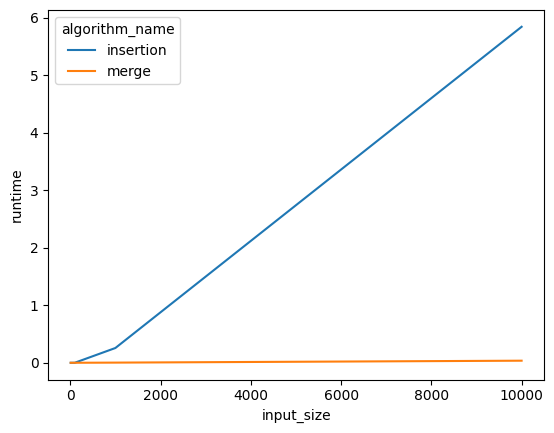

In [ ]:
# @title Q3.4.4-response
import seaborn as sns

# Your code here
sns.lineplot(x='input_size', y='runtime', hue='algorithm_name', data=runtime_df)

# Please do not modify the following three lines (Without them the autograder
# will not be able to access the data in your plot, so all tests will fail D:)
import matplotlib.pyplot as plt
q3_4_4_axes = plt.gca()
plt.show()

In [ ]:
# @title Q3.4.4-public-tests
q3_4_4_public_tests = {
    'Correct plot type': 'Passed!' if "sns.lineplot" in _i else 'The code in the previously-executed cell does not call sns.lineplot()'
}
q3_4_4_public_tests

{'Correct plot type': 'Passed!'}

### Question 3.4.5

Here, as one final step, we're going to apply a transformation which is extremely common (and extremely important!) for analyzing/comparing the runtimes of different algorithms. Notice how the values in `input_sizes` got **exponentially** larger each time: from `10` to `100` to `1000`. The default settings in Seaborn, however, produce **linear** plots of the data. While this is a reasonable default, it can be difficult to see the pattern of exactly when (at what value of $n$) the overhead required for merge sort becomes "worth it".

So, to see this more clearly: take the plot you produced above and pass an additional argument to the Seaborn function telling it to plot **both** the $x$-axis **and** $y$-axis on a **logarithmic** rather than **linear** scale!

*Note how, in the starter code for the previous question, we didn't import matplotlib.pyplot at the top of the cell (only near the end, for the autograder code). In the starter code for this question, however, we've imported both Seaborn **and** `matplotlib.pyplot` (using the alias `plt`) right at the top.  This is a big big hint for how you might transform the axes to use a log scale, using only ‼️two additional lines of code‼️)*

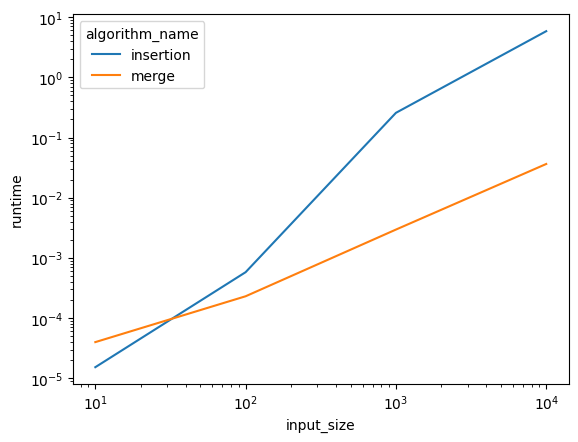

In [ ]:
# @title Q3.4.5-response
import matplotlib.pyplot as plt
import seaborn as sns

# Your code here
sns.lineplot(x='input_size', y='runtime', hue='algorithm_name', data=runtime_df)
plt.xscale('log')
plt.yscale('log')

# Please do not modify the following two lines (Without them the autograder
# will not be able to access the data in your plot, so all tests will fail D:)
q3_4_5_axes = plt.gca()
plt.show()

In [ ]:
q3_4_5_public_tests = {
    'Two log transformations': 'Passed!' if _i.count("'log'") + _i.count('"log"') >= 2 else "The code in the previously-executed cell should pass the string 'log' to a function at least twice."
}
q3_4_5_public_tests

{'Two log transformations': 'Passed!'}

Hopefully, if all of the above steps worked out as planned, you should now be able to see within this plot the **exact point** at which the performance of **merge sort** surpasses the performance of **insertion sort**. The first time I saw this I thought it was quite cool, and I hope you think so too 🤓

## Part 4: Object-Oriented Programming

In Week 2 we discussed a paradigm for problem-solving through code called **Object-Oriented Programming**. The gist is: to take a system we have "in our head" and implement it in code, we break the system down into **pieces**, such that we can think about (a) what **properties** each piece would have, and then (b) how the pieces would **fit together**.

So, in the bookstore inventory example we went through in Week 2, we broke our task down into the more manageable pieces of having separate classes for entities like `Book`, `Author`, and so on.

For this part of the assignment, you've been hired as the **data analyst for a local swim team**, and you're hoping to start off at your new job by converting their messy, **spreadsheet-based** infrastructure to an **object-oriented** structure for storing and accessing information about each swimmer's performance over time!

*(Note that the inspiration for this question comes from the programming project example that is used throughout the book "Head First Python" by Paul Barry, and that you can <a href='https://learning.oreilly.com/library/view/head-first-python/9781492051282/?sso_link=yes&sso_link_from=georgetown-university' target='_blank'>read the brand-new 3rd Edition of this book for free</a> via O'Reilly's website, using your Georgetown credentials! The book has 14 chapters, each of which "build up" a system for digitizing and visualizing a swim coach's on-paper spreadsheets; it doesn't cover OOP, however, so you can think of this part of the assignment as you writing the 15th chapter to Barry's book 😎)*

### Question 4.1

So, to do this you'll need to create the following classes:

#### **`Team`**

This is the "overarching" class which will keep track of your entire team.

It should have a **constructor** function which takes only the single argument (required for all contructor functions in Python) `self`.

The constructor should initialize the following **instance variables**:

* `swimmers`: An object which should start out as an empty Python `list` object (`[]`), but should be updated with each call to the `add_swimmer()` function, so that it will become a list of `Swimmer` objects specifically.

And the class should have the following **instance methods**:

* `add_swimmer(self: Team, swimmer_obj: Swimmer) -> bool`: A Python **function** which takes the `Swimmer` object named `swimmer_obj` as its only argument (besides the required `self` object) and attempts to add this object to the `swimmers` instance variable (using the built-in `append()` function that all `list` objects in Python have). If it succeeds in adding the object to `swimmers`, the function should return the `bool` value `True`, otherwise it should return the `bool` value `False`.
* `get_swimmer(self: Team, name: str) -> Swimmer | None`: A Python function which takes in a `str` value called `name` and returns one of two possible things: either (a) the first `Swimmer` object found within the `swimmers` instance variable whose name is `name`, or (b) the value `None` if no swimmer is found within the `swimmers` instance variable with this name. Your code for this function should utilize the `has_swimmer()` function described below, so don't start until you've also read the description for that function!
* `get_swimmers(self: Team) -> list[Swimmer]`: Notice the pluralized **swimmers** rather than **swimmer** here! This function does not take in any arguments (besides the required `self` argument), and simply returns whatever value is stored in the `swimmers` instance variable for the object.
* `has_swimmer(self: Team, name: str) -> bool`: A Python function which takes in a `str` value called `name` and returns the `bool` value `True` if a swimmer with that name exists on the team, and the `bool` value `False` otherwise. (You can assume that no two swimmers stored using your system will ever have the same name). (As mentioned above, this function should be called directly from within the `get_swimmer()` function)

#### **`Swimmer`**

The `Swimmer` class will keep track of all the information you have for a **single swimmer**.

The class should have a **constructor** function which takes arguments with the following names:
  * `self: Swimmer` (required for all constructor and instance functions in Python)
  * `name_arg: str`
  * `age_arg: int`

Then, within the constructor function, your code should create **instance variables** as follows:
  * `name`: A `str` representing the swimmer's full name, which should be set to have the value of the argument `name_arg` that was passed to the constructor (see above)
  * `age`: An `int` representing the swimmer's age, in years, which should be set to have the value of the argument `age_arg` that was passed to the constructor (see above)
  * `results`: A `list` object which should start out without any elements (`[]`) when the `Swimmer` object is created (in other words, it should be assigned the value `[]` within the constructor function for `Swimmer`), but should be **updated** to contain `EventResult` objects whenever the `add_result()` instance method is called (see below).
  * `favorite_swim_style`: An object which should start out with the value `None` when the `Swimmer` object is first created (so, in the constructor function for the `Swimmer` class), but should be set to a value of type `SwimStyle` by a **function** within the `Swimmer` class called `compute_favorite_swim_style()`, which is described below.

The class should have the following **instance methods**:

* `get_name(self) -> str`: Returns the current value contained in the `name` instance variable
* `get_age(self) -> int`: Returns the current value contained in the `age` instance variable
* `add_result(self, result_obj) -> bool`: Similar to the `add_swimmer()` function described above for the `Team` class, this function should take in an argument called `result_obj`, but should return the `bool` value `False` if `result_obj` is not an object of type `EventResult`. If `result_obj` *is* an object of type `EventResult`, then this function should add it to the end of the `results` instance variable. Finally (before the end of the function), it should call the `compute_favorite_swim_style()` function (which will ensure that the `favorite_swim_style` instance variable is kept up-to-date as events are added). If the adding was successful, and the call to `compute_favorite_swim_style()` also completed successfully (returned the boolean value `True`), then this function (`add_result()`) should return the `bool` value `True`.
* `compute_favorite_swim_style(self) -> None`: This function should iterate through the instance variable called `results` and determine the most common value of `swim_style` across all of these results (so, in particular, you don't need to pay attention to the **distance** that was swum for any of the results). For example, if the swimmer has 8 recorded times for Freestyle events, but only 6 recorded times for Backstroke event type (and no recorded times for the other two possible styles), this function should identify `SwimStyle.FREESTYLE` as that swimmer's favorite swim style. If two or more possible swim styles are **tied**, you should return the one that comes **first in the alphabet**: if `SwimStyle.BACKSTROKE` and `SwimStyle.BUTTERFLY` are tied for a given swimmer, for example, your function should identify `SwimStyle.BACKSTROKE` as that swimmer's favorite style.
* `get_favorite_swim_style(self) -> SwimStyle`: Unlike the `compute_favorite_swim_style()` function just described, this **does not** actually compute anything, but **does** return a value. Specifically, it just returns whatever value is stored in the `favorite_swim_style` instance variable.
* `get_results(self) -> list[EventResult]`: This Python function doesn't take any arguments, and just returns whatever value is stored in the instance variable called `results`.

**Important point here, though!!** Having both a `compute_favorite_swim_style()` function and a `get_favorite_swim_style()` function may seem strange at first, because the former **doesn't return anything** (a Python function without any return statement automatically returns the value `None`, hence the type hint for this function given here). Instead, it just **stores the result** of its computation into the instance variable called `favorite_swim_style`, which can then be **accessed** using `get_favorite_swim_style()`. We will see in class why this **design pattern** is sometimes more helpful than the more "intuitive" design pattern of having `compute_favorite_swim_style()` just return its computed value!

#### **`EventResult`**

This class will be used to record the **results** (the race time, in milliseconds) for a given swimmer at a specific **event**. Therefore, its main purpose is to "combine" two pieces of information via its two instance variables, described below:

The class should have a **constructor** which accepts two arguments, with the following names:
  * `self: EventResult` (Required for all Python constructors)
  * `swim_style_arg: SwimStyle`
  * `completion_time_arg: float`

This constructor should initialize the following **instance variables**:
  * `swim_style`: An object of type `SwimStyle`, assigned to have the value `swim_style_arg` which was passed to the constructor function.
  * `completion_time`: A `float` value representing the swimmer's time in **milliseconds** (see below for why it matters that we specify this unit over e.g. seconds or minutes), assigned to have the value `completion_time_arg` which was passed to the constructor function.

Here, however, we are constructing what's called an **Abstract Base Class (ABC)**, which means that in fact we should **never call this constructor directly!** (Concretely, this means that in your code it should extend Python's <a href='https://docs.python.org/3/library/abc.html' target='_blank'>`ABC` class</a>)

This is because you will create two **subclasses** of this class, each of which will implement their own constructor functions based on what **race length** they represent! (See below)

The class should also have the following **instance methods**:

* `get_swim_style(self) -> SwimStyle`: This Python function just returns whatever value is stored in the `swim_style` instance variable for the object.
* `get_completion_time(self) -> float`: This Python function just returns whatever value is stored in the `completion_time` instance variable for the object.
* `get_distance(self) -> int`: This Python function should **not have any code in it, besides the Python `pass` command!** This is for the same reason as why the constructor for this class should never actually be called: this parent class (`EventResult`) **does not implement** this function, since each of its child classes (`ShortEventResult` and `LongEventResult`) will have a different implementation of it, appropriate for what they represent.

#### **`ShortEventResult`** and **`LongEventResult`**

Both of these classes should **extend** the `EventResult` class. They should both have **constructor** functions which **implement** the **abstract** constructor defined in `EventResult`, described above. Since the `EventResult` constructor already handles setting the `event_style` and `completion_time` instance variables, all that the constructors for these two subclasses need to do is:

1. Call the constructor function within the `EventResult` (when this line finishes, then, you know that the object you're creating already has **two** defined attributes: `event_style` and `completion_time`.
2. Set the value of a third instance variable called `event_length` to the appropriate value: the constructor within the `ShortEventResult` class should assign this attribute the `int` value `50`, whereas the constructor within the `LongEventResult` class should assign this attribute the `int` value `100`.

Then, all that's left is to implement the two different **implementations** that these two classes should have for the parent class's non-implemented `get_distance()` function. Specifically, the `get_distance()` function within `ShortEventResult` should return the `int` value `50`, whereas the `get_distance()` function within `LongEventResult` should return the `int` value `100`.

#### **`SwimStyle`**

A Python <a href='https://docs.python.org/3/library/enum.html' target='_blank'>`Enum` class</a> with the four possible constants `FREESTYLE`, `BACKSTROKE`, `BREASTSTROKE`, and `BUTTERFLY` (representing the four possible swim styles for an event). Notice that these are **not** `str` values---they are essentially new "symbols" that we're telling Python we'd like to use by extending the `Enum` class!

It does not matter which particular `int` values you use to represent these four possible constants, since the point of the `Enum` class is to avoid the need to create a [name of a constant] $\leftrightarrow$ [`int` value] mapping in the first place. This means that the **other** classes you're creating should **not** depend on any particular choices for this mapping: all other parts of your code should depend **only** on the ability to use (for example) `SwimStyle.FREESTYLE` as a value...

**For those who have taken DSAN 5000 and/or worked with Pandas before** (which I think is **all of you!** 🧐), and **especially for those who have taken DSAN 6300 and/or worked with databases and SQL before:**

While working on this part, you should be thinking about this OOP-based approach to solving the problem in comparison with the more "standard" **Pandas-based** or **SQL-based** approaches that could have been used to solve the same problem: in other words (you don't have to answer these explicitly, just think about them as you work!), what are some advantages and disadvantages to approaching the problem in this way, as compared with creating a big Pandas `DataFrame` for the team (for example) or creating a series of DB tables and accessing/updating them via SQL?

In [ ]:
from enum import Enum

class SwimStyle(Enum):
    FREESTYLE = 1
    BACKSTROKE = 2
    BREASTSTROKE = 3
    BUTTERFLY = 4

from abc import ABC, abstractmethod

class EventResult(ABC):
    def __init__(self, swim_style_arg: SwimStyle, completion_time_arg: float):
        self.swim_style = swim_style_arg
        self.completion_time = completion_time_arg

    @abstractmethod
    def get_distance(self) -> int:
        pass

class ShortEventResult(EventResult):
    def __init__(self, swim_style_arg: SwimStyle, completion_time_arg: float):
        super().__init__(swim_style_arg, completion_time_arg)
        self.event_length = 50

    def get_distance(self) -> int:
        return 50

class LongEventResult(EventResult):
    def __init__(self, swim_style_arg: SwimStyle, completion_time_arg: float):
        super().__init__(swim_style_arg, completion_time_arg)
        self.event_length = 100

    def get_distance(self) -> int:
        return 100

class Swimmer:
    def __init__(self, name_arg: str, age_arg: int):
        self.name = name_arg
        self.age = age_arg
        self.results = []
        self.favorite_swim_style = None

    def get_name(self) -> str:
        return self.name

    def get_age(self) -> int:
        return self.age

    def add_result(self, result_obj) -> bool:
        if isinstance(result_obj, EventResult):
            self.results.append(result_obj)
            self.compute_favorite_swim_style()
            return True
        return False

    def compute_favorite_swim_style(self) -> None:
        style_count = {}
        for result in self.results:
            style = result.swim_style
            if style in style_count:
                style_count[style] += 1
            else:
                style_count[style] = 1
        if style_count:
            self.favorite_swim_style = max(style_count, key=style_count.get)

    def get_favorite_swim_style(self) -> SwimStyle:
        return self.favorite_swim_style

    def get_results(self) -> list:
        return self.results

class Team:
    def __init__(self):
        self.swimmers = []

    def add_swimmer(self, swimmer_obj) -> bool:
        if isinstance(swimmer_obj, Swimmer):
            self.swimmers.append(swimmer_obj)
            return True
        return False

    def get_swimmer(self, name: str):
        for swimmer in self.swimmers:
            if swimmer.get_name() == name:
                return swimmer
        return None

    def get_swimmers(self) -> list:
        return self.swimmers

    def has_swimmer(self, name: str) -> bool:
        return any(swimmer.get_name() == name for swimmer in self.swimmers)


In [ ]:
# @title Q4.1-public-tests
from enum import Enum
from abc import ABC
q4_1_public_tests = {
  'Implements Enum': 'Passed!' if issubclass(SwimStyle, Enum) else "SwimStyle class needs to implement Enum type",
  'Implements ABC': 'Passed!' if issubclass(EventResult, ABC) else "EventResult class needs to implement ABC type"
}
q4_1_public_tests

{'Implements Enum': 'Passed!', 'Implements ABC': 'Passed!'}

## Question 4.2: Using the OOP Structure

Now that you've created your amazing swim-team-management system, in this question we'll put it to the test, by **using it** to store and analyze actual data!

Here we provide swim team data from Paul Barry's "Head First Python" book, mentioned above. You can run the following code cell to create a Python list object called `csv_urls`, in which each element will be a **string** representing the **full URL** for a `.csv` file corresponding to data for a particular swimmer on your team.

Notice the consistent structure of the **filenames** for each `.csv` file: each file's name provides four pieces of information, that you can use to decide "where" in your Object-Oriented system to store the data within the file:

```
<Name>-<Age>-<Event Length>-<Event Style>.txt
```

So, for example, the first file (alphabetically) in the collection has the filename:

```
Abi-10-50m-Back.txt
```

Meaning that this file contains the results for a swimmer named `"Abi"`, age 10, in their 50m Backstroke events.

The **content** of this file looks as follows:

```
41.50,43.58,42.35,43.35,39.85,40.53,42.14,39.18,40.89,40.89
```

Which represents comma-separated runtimes for **ten** 50m Backstroke events that Abi has participated in. Notice how, in this file, each time has the following format:

```
<Seconds>.<Milliseconds>
```

However, you need to be careful about looking through the data files to get a sense for the specific **format** for each swimmer's times. Take a look at the content within 4th file in the dataset, for example, called `Abi-10-100m-Back.txt`:

```
1:31.59,1:26.55,1:28.75,1:39.79,1:32.37
```

This shows why you need to be careful when parsing the files: in this case, we still have comma-separated times, this time for each of the **five** 100m Backstroke events Abi participated in, but now the times themselves have the format

```
<Minutes>:<Seconds>.<Milliseconds>
```

*(Note: the code in the next cell also prints out the **first 10 URLs**, so you can see the structure of the filenames, but remember that this is only the **first 10** of the **50 total** `.csv` files that you need to process!)*

In [ ]:
from bs4 import BeautifulSoup
import requests
url = 'https://jpj.georgetown.domains/dsan5500-scratch/swimdata'
ext = 'txt'
csv_urls = []
def get_url_contents(file_url):
  file_response = requests.get(file_url)
  return file_response.text
def get_file_urls(dir_url, ext=''):
    page_response = requests.get(dir_url)
    page_text = page_response.text
    soup = BeautifulSoup(page_text, 'html.parser')
    return [url + '/' + node.get('href') for node in soup.find_all('a') if node.get('href').endswith(ext)]
for file_url in get_file_urls(url, ext):
    csv_urls.append(file_url)
print(f"Total URLs: {len(csv_urls)}")
# The following two lines just extract and print out the *first 10 URLs*
first_10_str = '\n'.join(csv_urls[:10])
print(f"First 10 urls:\n{first_10_str}\n")
# The following two lines obtain and print out the *text content* of a given URL
first_url_contents = get_url_contents(csv_urls[0])
print(f"Contents of first URL:\n{first_url_contents}")

Total URLs: 50
First 10 urls:
https://jpj.georgetown.domains/dsan5500-scratch/swimdata/Abi-10-50m-Back.txt
https://jpj.georgetown.domains/dsan5500-scratch/swimdata/Abi-10-50m-Breast.txt
https://jpj.georgetown.domains/dsan5500-scratch/swimdata/Abi-10-50m-Free.txt
https://jpj.georgetown.domains/dsan5500-scratch/swimdata/Abi-10-100m-Back.txt
https://jpj.georgetown.domains/dsan5500-scratch/swimdata/Abi-10-100m-Breast.txt
https://jpj.georgetown.domains/dsan5500-scratch/swimdata/Ali-12-100m-Back.txt
https://jpj.georgetown.domains/dsan5500-scratch/swimdata/Ali-12-100m-Free.txt
https://jpj.georgetown.domains/dsan5500-scratch/swimdata/Alison-14-100m-Breast.txt
https://jpj.georgetown.domains/dsan5500-scratch/swimdata/Alison-14-100m-Free.txt
https://jpj.georgetown.domains/dsan5500-scratch/swimdata/Aurora-13-50m-Free.txt

Contents of first URL:
41.50,43.58,42.35,43.35,39.85,40.53,42.14,39.18,40.89,40.89



Now that you have the full list of URLs (stored in the variable called `csv_urls`), and the function `get_url_contents()` which takes a single URL string as its only argument and returns the **text contents** of that URL, your job is to **ingest** the raw `.txt` files, store the data using the instance variables of the various classes you created above, and then produce a (small) **report** in the form of a **Python dictionary** called `team_analysis_results` with the following keys and values:

| Key | Value |
| - | - |
| `fastest_short` | A dictionary mapping each of the four possible `SwimStyle` values to a `tuple` object `(x, y)`, where `x` is the name of the swimmer with the **fastest** time in a short (50m) race with that style, and `y` is that fastest time itself (in milliseconds) |
| `fastest_long` | A dictionary mapping each of the four possible `SwimStyle` values to a `tuple` object `(x, y)`, where `x` is the name of the swimmer with the **fastest** time in a long (100m) race with that style, and `y` is that fastest time itself (in milliseconds) |
| `favorites` | A dictionary mapping the name of each swimmer on the team to their **favorite swim style** (as defined above in the description of the `compute_favorite_swim_style()` function within the `Swimmer` class). |
| `total_swim_time` | This one is not a dictionary, just a single `float` value representing the **total cumulative amount of time** that **all swimmers on the team** have swam, combined, across all events in the data. |

In [ ]:
def convert_time_to_milliseconds(time_str):
    """Converts time from 'minute:second.millisecond' format to milliseconds."""
    if ':' in time_str:
        minutes, seconds = time_str.split(':')
        total_seconds = int(minutes) * 60 + float(seconds)
    else:
        total_seconds = float(time_str)
    return total_seconds * 1000

def parse_event_info(url):
    """Extracts swimmer name, age, distance, and swim style from the URL."""
    parts = url.split('/')[-1].split('-')
    if len(parts) < 4:
        return False
    name = parts[0]
    age = int(parts[1])
    distance = parts[2]
    style_abbr = parts[3].split('.')[0].upper()

    style_map = {
        'BACK': 'BACKSTROKE',
        'BREAST': 'BREASTSTROKE',
        'FREE': 'FREESTYLE',
        'FLY': 'BUTTERFLY'
    }

    style = style_map.get(style_abbr, style_abbr)

    return name, age, distance, style


team = Team()
fastest_short = {style: (None, float('inf')) for style in SwimStyle}
fastest_long = {style: (None, float('inf')) for style in SwimStyle}
total_swim_time = 0.0

for url in csv_urls:
    try:
        name, age, distance, style = parse_event_info(url)
    except:
        print(f"Skipping line: {get_url_contents(url)}. Insufficient data")
        continue
    contents = get_url_contents(url)
    times_str = contents.strip().split(',')
    times = [convert_time_to_milliseconds(time_str) for time_str in times_str]
    # print(times)
    best_time = min(times)
    total_swim_time += sum(times)

    swimmer = team.get_swimmer(name)
    if not swimmer:
        swimmer = Swimmer(name, age)
        team.add_swimmer(swimmer)

    event_result_class = ShortEventResult if distance == '50m' else LongEventResult
    swimmer.add_result(event_result_class(SwimStyle[style], best_time))

    if distance == '50m' and best_time < fastest_short[SwimStyle[style]][1]:
        fastest_short[SwimStyle[style]] = (name, best_time)
    elif distance == '100m' and best_time < fastest_long[SwimStyle[style]][1]:
        fastest_long[SwimStyle[style]] = (name, best_time)

favorites = {swimmer.get_name(): swimmer.get_favorite_swim_style().name for swimmer in team.get_swimmers()}

team_analysis_results = {
    "fastest_short": {style.name: fastest_short[style] for style in SwimStyle},
    "fastest_long": {style.name: fastest_long[style] for style in SwimStyle},
    "favorites": favorites,
    "total_swim_time": total_swim_time
}

In [ ]:
# @title Q4.2-public-tests
q4_2_public_tests = {
    "'fastest_short' key maps to dictionary": 'Passed!' if type(team_analysis_results['fastest_short']) == dict else "team_analysis_results should have a string key 'fastest_short' mapped to a Python dict object.",
    "'fastest_long' key maps to dictionary": 'Passed!' if type(team_analysis_results['fastest_long']) == dict else "team_analysis_results should have a string key 'fastest_long' mapped to a Python dict object.",
    "'favorites' key maps to dictionary": 'Passed!' if type(team_analysis_results['favorites']) == dict else "team_analysis_results should have a string key 'favorites' mapped to a Python 'dict' object.",
    "Correct type for total_swim_time": 'Passed!' if type(team_analysis_results['total_swim_time']) == float else "team_analysis_results should have a string key 'total_swim_time' mapped to a 'float' object."
}
q4_2_public_tests

{"'fastest_short' key maps to dictionary": 'Passed!',
 "'fastest_long' key maps to dictionary": 'Passed!',
 "'favorites' key maps to dictionary": 'Passed!',
 'Correct type for total_swim_time': 'Passed!'}

While that might have seemed like a lot of work for not much payoff in its current state, my hope is that you can see how this type of OOP structure could potentially help in certain data modeling scenarios: for example, having the `compute_favorite_swim_style()` function **encapsulated** within the `Swimmer` class might seem weird on a small scale (why not just compute it manually, in a loop or something, outside of all these classes/objects?), but now imagine that this is a big system ingesting and updating all the time, and suddenly your boss wants you to change the **definition of how "favorite" is computed for a swimmer**... Rather than frantically trying to look for the lines of code in some for loop somewhere, now you know exactly what to do: you can just update the **internal** code within that function, and all of the other "pieces" in your system don't have to work any differently. They call the "black box" of the `compute_favorite_swim_style()` function just as before, and receive a `SwimStyle` object just as before, without ever needing to "know" that anything has changed **inside of** the function!

## Part 5: Linked List Using OOP

Have you ever wondered how lists are actually **implemented** in a given programming language? I'm guessing you haven't, because you wonder about more important things, but in this part we're 🥳🥳🥳**forcing you to think about it!!!**🥳🥳🥳 Woohoo!

But actually, seriously: although it's not so important that you know the minute details of how **every single type of list** is implemented in **every programming language**, the type of list we'll be looking at in this part---called the **linked list**---will genuinely provide you with an understanding of a "basic structure" that underlies nearly **all** of the fancier algorithms you might learn in a full-on intense algorithms class!

The idea, and the reason why this had to come *after* complexity analysis as well as OOP, is:

* We'll make a class called `LinkedList`, but it will have an *extremely* simple structure: it will have a single instance variable called `root`, which will either:
  * (a) Have the value `None` (for empty lists), or
  * (b) **Point to** (remember our discussion of stack vs. heap!) an object of type `LinkedListNode`
* The `LinkedListNode` class will do most of the "work" of the Linked List. Basically, objects of this class will have:
  * An instance variable called `contents` representing the **value** that is stored in this node within the list, and
  * An instance variable called `next` which (like the `root` variable) will either
    * Have the value `None` (if this node represents the **last** element in the list), or
    * **Point to** another object of type `LinkedListNode`
  * An instance method called `get_contents()`, which will just return whatever value is currently stored in the `contents` instance variable.

If you can internalize the information in the above bullet points, you are ready to be a full-on algorithm/data-structure designer! Seriously!

This is because, as surprising as it may sound, a **huge** portion of the data structures which may seem fancier than Linked Lists are in fact just created by making **slight modifications** to the basic structure described in the above bullet points.

For example, if you've heard of a data structure called a **Binary Search Tree**, this fancier data structure is almost identical to the Linked List structure, except that wherever a Linked List has a **single** pointer to the next element (which we called `next` above), a Binary Search Tree has **two** pointers, one named `left` and another named `right`. This means that, quite literally, you could add one additional line to the code you'll write in this part to change it from implementing a Linked List to implementing a Binary Search Tree.

Building on this, even some of the fanciest algorithms in common usage, like the <a href='https://en.wikipedia.org/wiki/Quadtree' target='_blank'>Quadtree</a> structure that we saw in Week 2 when we discussed how Google Maps works, can once again be constructed via a tiny modification to a Binary Search Tree: each `Node` object now has **four pointers**, `ne`, `se`, `nw`, and `sw`. I promise, I'm not oversimplifying here; understanding how Linked Lists works is genuinely the key which unlocks a "language" for you to understand how fancier algorithms like the Quadtree are structured!

### Question 5.1

Build on the starter code in the following cell (titled `Q5.1-response`) to create classes `MyLinkedList` and `MyLinkedListNode` implementing the structure described at the beginning of this part (the bullet points above).

In [ ]:
class MyLinkedList:
    def __init__(self):
        self.root = None

    def is_empty(self):
        return self.root is None

    def append(self, new_content):
        new_node = MyLinkedListNode(new_content)
        if self.is_empty():
            self.root = new_node
        else:
            current = self.root
            while current.next:
                current = current.next
            current.next = new_node

class MyLinkedListNode:
    def __init__(self, contents):
        self.contents = contents
        self.next = None

    def get_contents(self):
        return self.contents

In [ ]:
# @title Q5.1-public-tests
from inspect import signature
q5p1_public_tests = {
    'LinkedList root node': 'Passed!' if 'root' in dir(MyLinkedList()) else "The LinkedList class needs an instance variable called 'root'.",
    'LinkedListNode constructor with argument': 'Passed!' if len(signature(MyLinkedListNode.__init__).parameters) == 2 else "LinkedListNode constructor should accept 2 arguments."
}
q5p1_public_tests

{'LinkedList root node': 'Passed!',
 'LinkedListNode constructor with argument': 'Passed!'}

### Question 5.2

Now that we have our two classes set up, `LinkedList` and `LinkedListNode`, think about how you could start actually **using** these two classes (which should actually be fairly similar, hint hint 😜), by writing the following three functions (`__str__()` and `__repr__()` are very related, hence three functions but only two items in the following list) as a Version 2.0 of our Linked List implementation, where the two classes will now be called `FancyLinkedList` and `FancyLinkedListNode`:

1. An **instance method** called `append()`, which **takes in an item** called `element` as its only argument and **adds it to the end of the list**, and
2. A `FancyLinkedList`-specific **implementation** of two functions which are technically defined for all Python objects since they all inherit Python's `object` class: `__str__()` and `__repr()__`

Details on these three functions are as follows:

**1. The `append()` Method**

This may be tough if you've never seen the Linked List structure before, but think about the diagrams I drew on the board in Week 2 of a **subway line** which makes **all local stops**: the subway line has some first station (so, in our case, a `FancyLinkedListNode` that the main class `FancyLinkedList` has a pointer to), and then from this first station you can **follow the pointers to the next station** repeatedly, station-by-station, until you reach a station which **has no next station**. In our case, this would be represented as a `FancyLinkedListNode` whose `next` pointer is set to Python's "blank" value, `None`.

If you're like me and your brain works better when you have **test code** that you can use to check whether your impementation works, you should **use the public test code cell** (titled `Q5.2-public-tests`, below the `Q5.2-response` cell) as a resource for checking the correctness of your `append()` code as you finish writing it! Since they're public tests, for you to use as you see fit, you can **comment out** tests which check things you haven't finished yet, then **uncomment them** when you're ready to move to another part of the problem.

**2. The `__str__()` and `__repr__()` Functions**:

The weird double-underscores (`__`) before and after the names of these functions indicate that they have **special meanings** in Python, in that Python expects **all objects** to have these two functions (among others!), and it will call these functions automatically, "under the hood", while working with the objects.

If you've ever wondered how exactly Jupyter "knows" what to print as output when you enter the **name of a variable** in the last line of a cell... `__repr__()` is the function that provides this desired output to Jupyter! The name is an abbreviation of **"representation"**, and it implies that *This function should return a **string representation** of the object*. So, when you create a code cell in your Jupyter notebook, type the name of a variable, and execute the cell, what really happens "under the hood" is that Jupyter takes that variable and calls its `__repr__()` function, then outputs whatever string this function returns as the output for that cell!

And, if you've ever wondered how exactly Python "knows" how to convert objects of various types into **string** objects when you use the conversion function `str()`... Or, more crucially, how Python "knows" what specific string to print when you call `print()` function... `__str__()` is the function that provides this **conversion into string form!** If someone uses your code to make an object `my_list` of type `FancyLinkedList`, then calls `print(my_list)` or `str(my_list)`, Python (under the hood) calls the `__str__()` function within your `FancyLinkedList` class.

If it's confusing why there are two separate functions for such similar goals, you can think of it this way:

* `__repr__()` is broadly intended to provide a string representation for **other Python developers** who may be **using** your code, whereas
* `__str__()` is broadly intended to provide a string representation for **end users** of whatever program/app/interface you're making.

So, as a real-world example from one of Python's "base" classes, note that you can always create a `datetime.datetime` object representing the **current time** (as in, an object representing the date and time at the moment that the object was created) using the `datetime.datetime.now()` function:

In [ ]:
import datetime
my_dt_object = datetime.datetime.now()

However, there are **two different contexts** in which we might want to convert `my_dt_object` into a string:

1. We may be a Python developer hoping to **inspect the details** of what **type** this variable is and what information it contains, **for our own understanding** when running or debugging some code.

In this context, generally, we'd want to use the object's `__repr__()` function, which will give us details about the **type** of the object as well as the **values** it contains:


In [ ]:
print(my_dt_object.__repr__())

datetime.datetime(2024, 1, 26, 9, 7, 34, 226037)


2. Alternatively, we may be a Python developer hoping to **use** the `datetime_object` variable as a timestamp for e.g. a file that we're creating, to be saved onto a user's local computer.

In this context, the result of the `__repr__()` call above would **not** be what we want: it would lead to a bunch of parentheses and commas and the string `"datetime.datetime"` being used in the filenames of the file we're trying to output. So, in this case we would instead want to use the `__str__()` function, which produces a string which is more amenable to **"downstream" use** (meaning, use that is not internal to Python, e.g. as parts of filenames or as timestamps placed at the bottom of images/documents):

In [ ]:
print(my_dt_object.__str__())

2024-01-26 09:07:34.226037


With all that said, in the case of `FancyLinkedList`, we actually (for now) want to produce the **same** string representation whether the user of our class is calling `print()` on a `FancyLinkedList` object (triggering its `__str__()` function) or just placing it at the end of a Jupyter code cell (triggering its `__repr__()` function). Therefore, for this question, you only need to write the `__repr__()` function, then have the class's `__str__()` function simply **call** the `__repr__()` function (so that calls to `__str__()` essentially just get "re-routed" to `__repr__()`).

To drive home the difference one more time (you can skip this and go straight to the `Q5.2-response` cell if you understand already!): we **could** write a class `MyCoolClass` with **separately-implemented** `__repr__()` and `__str__()` functions, like:

In [ ]:
class MyCoolClass:
  def __str__(self):
    return "This is the __str__() result!"

  def __repr__(self):
    return "This is the __repr__() result!"

Which would produce the following outputs, one line being created via `print()` and the other being created via the variable being placed in the last line of a Jupyter cell:

In [ ]:
my_cool_object = MyCoolClass()
print(my_cool_object)
my_cool_object

This is the __str__() result!


This is the __repr__() result!

Now that you've got all that under your belt, build on the starter code provided below to implement **Version 2.0** of your Linked List implementation, now with fancier support for **appending to the list** and **printing out the contents of the list!** (Hence the new class names 😎)

In [ ]:
class FancyLinkedListNode:
    def __init__(self, contents):
        self.contents = contents
        self.next = None

    def get_contents(self):
        return self.contents

class FancyLinkedList:
    def __init__(self):
        self.root = None

    def append(self, element):
        new_node = FancyLinkedListNode(element)
        if not self.root:
            self.root = new_node
        else:
            current = self.root
            while current.next:
                current = current.next
            current.next = new_node

    def __str__(self):
        elements = []
        current = self.root
        while current:
            elements.append(str(current.get_contents()))
            current = current.next
        return " -> ".join(elements)

    def __repr__(self):
        return f'{self.__class__.__name__}(["{" -> ".join([str(node.get_contents()) for node in self._iterate_nodes()])}"])'

    def _iterate_nodes(self):
        current = self.root
        while current:
            yield current
            current = current.next


In [ ]:
# @title Q5.2-public-tests
my_ll = FancyLinkedList()
if 'append' in dir(my_ll) and len(signature(FancyLinkedList().append).parameters) == 2:
  my_ll.append('a')
  my_ll.append('b')
  my_ll.append('c')
q5_2_public_tests = {
    'append() implemented': 'Passed!' if 'append' in dir(FancyLinkedList()) else "No function called append() defined in FancyLinkedList class.",
    'append() takes argument': 'Passed!' if len(signature(FancyLinkedList.append).parameters) == 2 else "append() should accept 2 parameters.",
    '__repr__() implemented': 'Passed!' if 'append' in dir(my_ll) and not my_ll.__repr__().startswith("<__main__.FancyLinkedList") else "(Non-default) __repr__() function not implemented in FancyLinkedList class."
}
q5_2_public_tests

{'append() implemented': 'Passed!',
 'append() takes argument': 'Passed!',
 '__repr__() implemented': 'Passed!'}

You did it! You made it to the end! You're a star 🤩 Thank you for making it this far.

Notice how, while in Question 3 we could **depend on** Python's built-in list implementation, so that we didn't need to think about questions like "how do I figure out the length of this list?" and we could instead focus on the algorithmic details of how Insertion-Sort and Merge-Sort work... But in Question 5, we no longer had that luxury, and suddenly things that were "automatic" while working on Question 3 (adding to a list or getting its length) suddenly became quite difficult, and you had to think much more about these details.

I think this is a phenomenon that you'll encounter throughout your career specifically when grappling with the topics in the name of the course: **Data Structures**, **Objects**, and **Algorithms**.

While working on an **algorithm**, for example, you may want to "abstract away" the details of the **data structures** you're using to implement it (e.g., the details of how Python `list`s work), whereas if you find that you need to make a custom **data structure** using the "building blocks" we'll learn in this course, it may be crucial to think "abstractly" about what **algorithms** you might want to optimize this data structure for: do I want to optimize my data structure so that **sorting** of its elements runs extremely quickly? Or do I instead want to optimize it so that I can **add and remove elements** extremely quickly?

Those are the types of questions we will start looking at in the next unit of the course, and in the next homework assignment as well!